# Prediction using Decision Tree Algorithm

In [1]:
#importing necesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 6)

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualizing the dataset

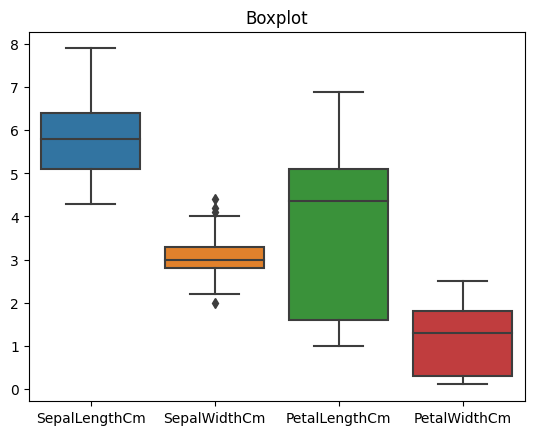

In [23]:
sns.boxplot(df)
plt.title('Boxplot')
plt.show()

In [27]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Importing libraries to create Decision Tree

ModuleNotFoundError: No module named 'graphiviz'

In [31]:
!pip install graphviz


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [34]:
import graphviz

In [35]:
#seperating variables
x = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df[['Species']]

In [36]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


Splitting data

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [39]:
x_train.shape

(105, 4)

In [40]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


Building Decision Tree

In [46]:
model =DecisionTreeClassifier(criterion='gini',min_samples_split=2,random_state=0)
model.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),


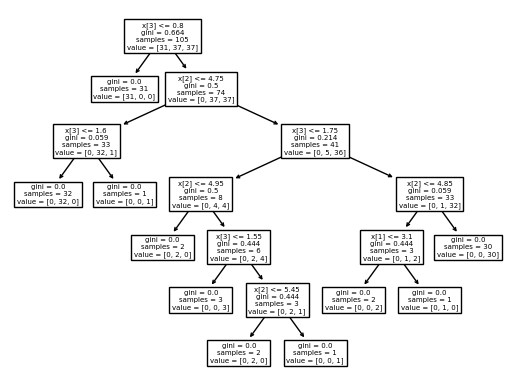

In [47]:
tree.plot_tree(model)

Visualizing the model

In [52]:
from sklearn import tree
import matplotlib.pyplot as plt

In [57]:
independent_var = list(df.columns[0:4])
independent_var

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

[Text(0.3076923076923077, 0.9285714285714286, 'node #0\nPetalWidthCm <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'node #1\ngini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = Iris-setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'node #2\nPetalLengthCm <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = Iris-versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'node #3\nPetalWidthCm <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = Iris-versicolor'),
 Text(0.07692307692307693, 0.5, 'node #4\ngini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.5, 'node #5\ngini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'node #6\nPetalWidthCm <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]\nclass = Iris-virginica'),
 Text(0.38461538461538464, 0.5, '

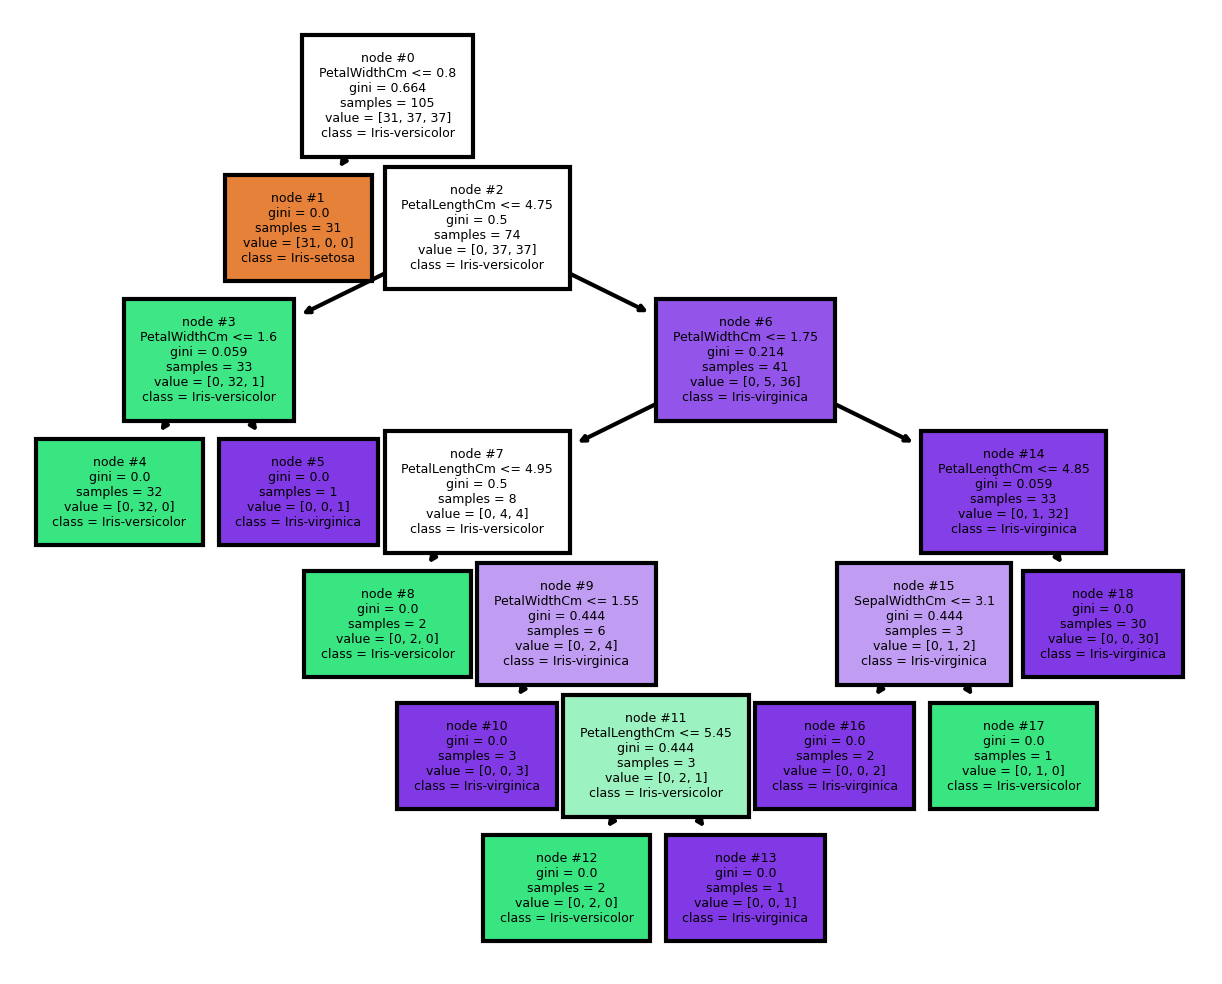

In [63]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows=1 , ncols=1 ,figsize=(5,4),dpi=300)
tree.plot_tree(model,
               feature_names = independent_var,
               class_names = species,
               filled = True,
               node_ids = True,
               fontsize = 3,
              )

Checking Accuracy

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [67]:
print('Accuracy Score: ' ,accuracy_score(y_test,y_test_pred)*100,'%')
print('Confusion Matrix: \n',confusion_matrix(y_test,y_test_pred))

Accuracy Score:  100.0 %
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Predicting with new data

In [68]:
data = [[5.1,2.3,4.5,7.3],[2.3,6.1,3.2,1.2]]
print(model.predict(data))

['Iris-virginica' 'Iris-versicolor']


C:\Users\KAIF\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
